<a href="https://colab.research.google.com/github/rohankhairnar2001/Book-Recommender-System/blob/main/Copy_of_Capstone_4_Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - BOOK RECOMMENDATION SYSTEM




##### **Project Type**    - Unsupervised Learning
##### **Contribution**    -
##### **Name -** Rohan Khairnar


#<font color=''>**Problem Statement**
<font color=''>
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

In [ ]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


#<font color=''>**The Data**


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# user dataset
user=pd.read_csv("Users.csv")

In [ ]:
# first view of user dataset
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


● Users :<br>


1.   User-ID: Contains the unique ID for each user.
2.   Location: Location of user.
3.   Age: Age of a user.


Location, Age is provided if available. Otherwise, these fields contain NULL values.

In [ ]:
# books dataset
book=pd.read_csv("Books.csv")

In [ ]:
# first view of books dataset
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


● Books : <br>


1.   ISBN: Unquie number given to each as its identification.
2.   Book-Title: Title of Book.
3.   Book-Autor: Autor of Book.
4.   Year-of-Publication: Year in which book is published.
5.   Publisher: Who publishesh the book.
6.   Image-URL-S:
7.   Image-URL-M:
8.   Image-URL-L:

URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>

In [ ]:
# Rating Dataset
rating=pd.read_csv("Ratings.csv")

In [ ]:
# first view of rating dataset
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


● Ratings :<br>


1.   User-ID: Unique ID of User.
2.   ISBN: Unique Number of a Book.
3.   Rating: Rating given by a user to book in scale of 0-10.

**Dimension of Datasets**



In [ ]:
# dimension of dataset
print(f'''Book_df shape is {book.shape}
Ratings_df shape is {rating.shape}
Users_df shape is {user.shape}''')

NameError: name 'book' is not defined

## **1) User Dataset**

In [ ]:
# Checking missing value
user.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [ ]:
# Unique values in user
print(f'unique value in age: ', sorted(user['Age'].unique()))
print(f'unique value in Location: ', user['Location'].nunique())

unique value in age:  [nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.

In [ ]:
# Take out country from Location
user['Country']=user.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
user.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [ ]:
# drop location column
user.drop('Location',axis=1,inplace=True)

In [ ]:
user.shape

(278858, 3)

In [ ]:
user.head()

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa
2,3,NaN,russia
3,4,17.0,portugal
4,5,NaN,united kingdom


In [ ]:
# Checking for Null values in new Country column
user.isnull().sum()

,0
User-ID,0
Age,110762
Country,368


In [ ]:
user['Country']=user['Country'].astype('str')

In [ ]:
user.shape

(278858, 3)

In [ ]:
# To check Country column
a=list(user.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(len(a))
print(a)

530
['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can'

We have some mispelling in data.

In [ ]:
# Replace mispelled word with correct one.
user['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [ ]:
user['Country'].value_counts()[:10]

,count
Country,
usa,139742
canada,21659
united kingdom,18557
germany,17074
spain,13258
australia,12935
italy,11282
other,4588
france,3487


Text(0.5, 1.0, 'Count of users Country wise')

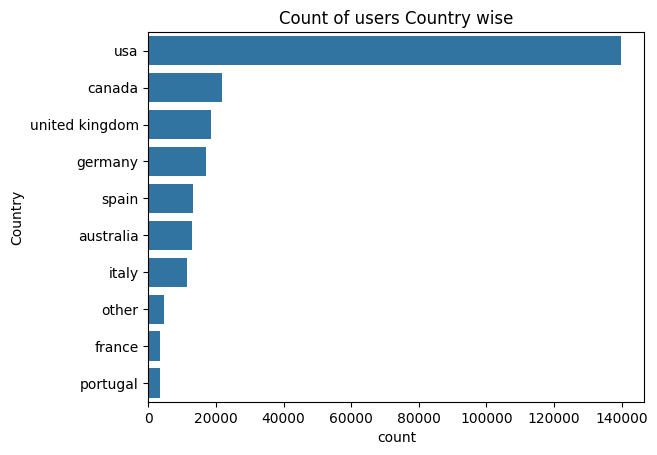

In [ ]:
# Top 10 Countries having most users.
sns.countplot(y='Country',data=user,order=pd.value_counts(user['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

USA had most number of users.

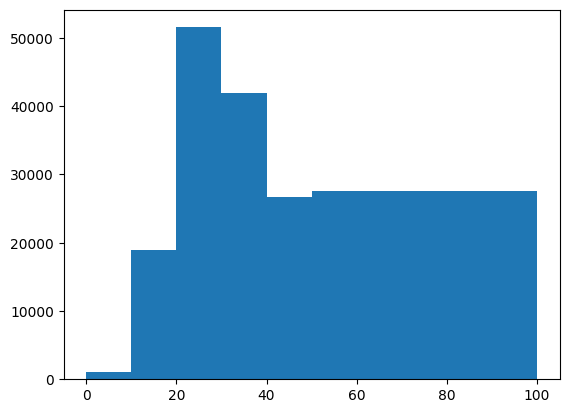

In [ ]:
# Plotting histogram for age column
plt.hist(user['Age'],bins=[0,10,20,30,40,50,100])
plt.show()

The most active users are among those in their 20–30s.

Text(0.5, 1.0, 'Find outlier data in Age column')

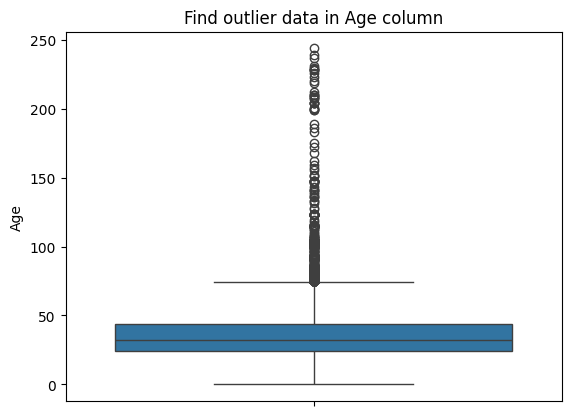

In [ ]:
# finding outlier in age
sns.boxplot(y='Age', data=user)
plt.title('Find outlier data in Age column')

We have outlier in the Age.

Treating Outliers in Age column

Text(0.5, 1.0, 'Age Distribution Plot')

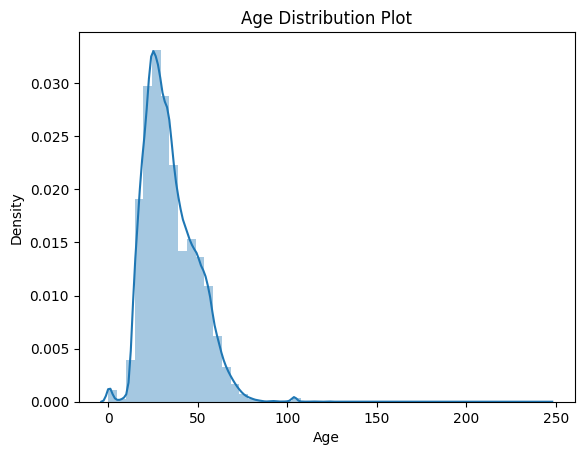

In [ ]:
sns.distplot(user['Age'])
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case. hence replacing these by NaNs

In [ ]:
# outlier data into NaN
user.loc[(user.Age > 100) | (user.Age < 5), 'Age'] = np.nan

In [ ]:
user.isnull().sum()

,0
User-ID,0
Age,112010
Country,0


To fill NaN we can't use median throughout the range. So we are gonna fill NaN with median on the basis of Country.

In [ ]:
user['Age'] = user['Age'].fillna(user.groupby('Country')['Age'].transform('median'))

In [ ]:
user.isnull().sum()

,0
User-ID,0
Age,276
Country,0


Still we have 276 null in age, Now we are gonna fill them with a mean.

In [ ]:
user['Age'].fillna(user['Age'].mean(),inplace=True)

In [ ]:
user.isnull().sum()

,0
User-ID,0
Age,0
Country,0


# 2 ) Book Dataset

In [ ]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Top 10 Authors which have written the most books.

Text(0.5, 1.0, 'Top 10 Authors')

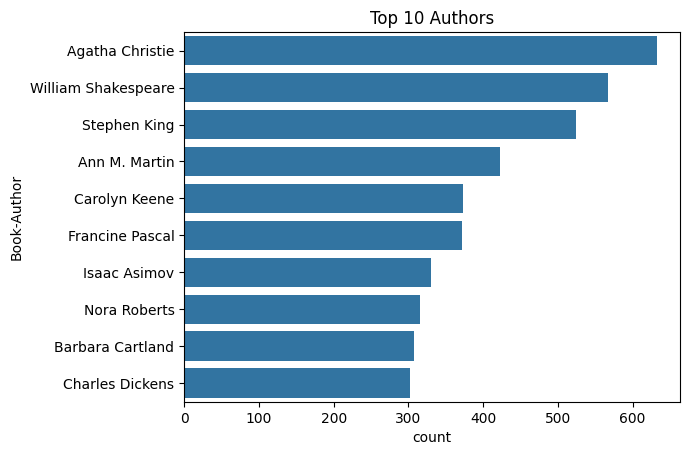

In [ ]:
sns.countplot(y='Book-Author',data=book,order=pd.value_counts(book['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

Top 10 Publisher which have published the most books.

Text(0.5, 1.0, 'Top 10 Publishers')

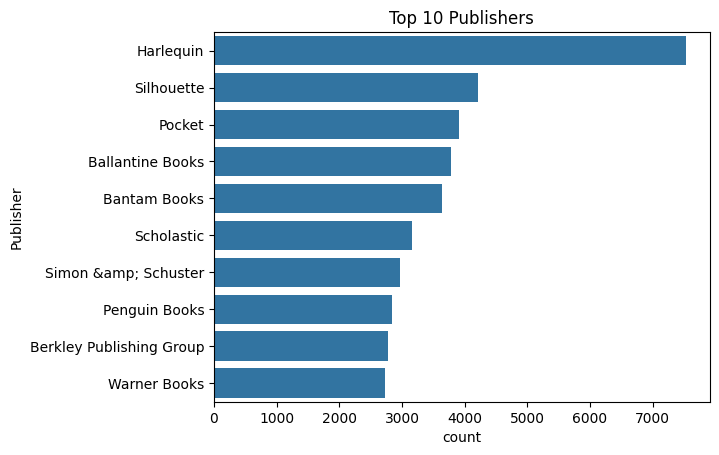

In [ ]:
sns.countplot(y='Publisher',data=book,order=pd.value_counts(book['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [ ]:
book['Year-Of-Publication']=book['Year-Of-Publication'].astype('str')
a=list(book['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [ ]:
# investigating the rows having 'DK Publishing Inc' as yearOfPublication
book.loc[book['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [ ]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
book.loc[book.ISBN == '0789466953','Year-Of-Publication'] = 2000
book.loc[book.ISBN == '0789466953','Book-Author'] = "James Buckley"
book.loc[book.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
book.loc[book.ISBN == '078946697X','Year-Of-Publication'] = 2000
book.loc[book.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
book.loc[book.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
book.loc[(book.ISBN == '0789466953') | (book.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
#investigating the rows having 'Gallimard' as yearOfPublication
book.loc[book['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
# making corrections
#ISBN '2070426769'
book.loc[book.ISBN == '2070426769','Year-Of-Publication'] = 2003
book.loc[book.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
book.loc[book.ISBN == '2070426769','Publisher'] = "Gallimard"
book.loc[book.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [ ]:
book.loc[book.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
book['Year-Of-Publication']=book['Year-Of-Publication'].astype(int)

In [ ]:
print(sorted(book['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for Year-Of_Publication is invalid and as their are some values greater than 2022, We have assumed that the years after 2021 to be invalid and setting invalid years as NaN

In [ ]:
book.loc[(book['Year-Of-Publication'] > 2021) | (book['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
book['Year-Of-Publication'].fillna(round(book['Year-Of-Publication'].median()), inplace=True)

In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis
book.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
book.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2


In [ ]:
# Looking for NaN in Author
book[book['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999.0,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [ ]:
# Filling Nan of Book-Author with others
book['Book-Author'].fillna('other',inplace=True)

In [ ]:
# Looking for NaN 'publisher' column
book.loc[book.Publisher.isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [ ]:
# Filling Nan of Publisher with others
book['Publisher'].fillna('other',inplace=True)

In [ ]:
book.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


# 3) Rating

In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Checking for any null vlaues
rating.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


Rating dataset should have books only which exist in our books dataset

In [ ]:
# Making new dataset which has rating of books that exist in our dataset
new_rating = rating[rating["ISBN"].isin(book["ISBN"])]
rating.shape,new_rating.shape

((1149780, 3), (1031136, 3))

Many books that are not part of book dataset gets dropped off

Ratings dataset should have ratings from users which exist in users dataset.

In [ ]:
# Checking for users in rating with our user dataset
print("Shape of dataset before dropping",new_rating.shape)
new_rating = new_rating[new_rating['User-ID'].isin(user['User-ID'])]
print("shape of dataset after dropping",new_rating.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset.

Let's see distribution of ratings

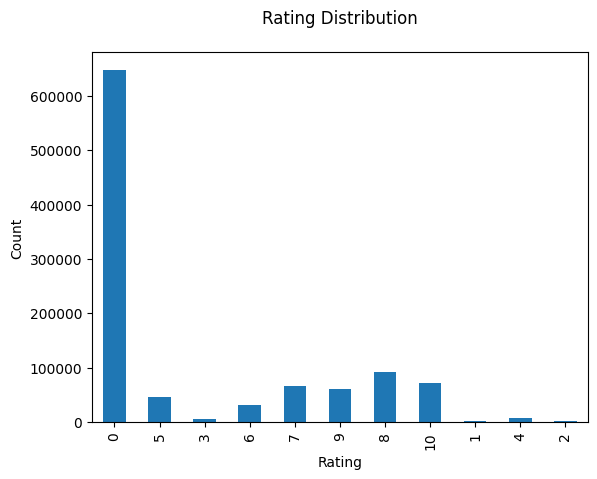

In [ ]:
# Plotting graph for distribution of ratings
new_rating['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit(rating=0) and explict(rating>0) ratings datasets

In [ ]:
# Segragating implicit and explict ratings datasets
ratings_explicit = new_rating[new_rating['Book-Rating'] != 0]
ratings_implicit = new_rating[new_rating['Book-Rating'] == 0]

In [ ]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

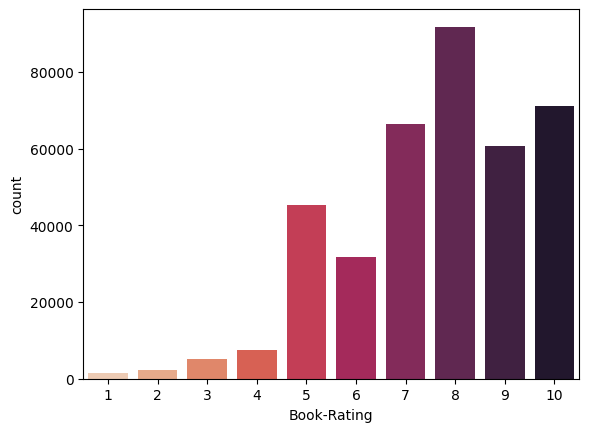

In [ ]:
# Countplot for explicit ratings
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

Let's find the top 5 books which are rated by most number of users.

In [ ]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [ ]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, book, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


The book that received the most rating counts in this data set is Alice Sebold’s “The Lovely Bones: A Novel”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [ ]:
# Create column Rating average
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform("mean")
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


# Merging All Datasets

In [ ]:
Final_Dataset=user.copy()
Final_Dataset=Final_Dataset.merge(ratings_explicit,on="User-ID")
Final_Dataset=Final_Dataset.merge(book,on="ISBN")


In [ ]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,8,33.0,canada,074322678X,5,5.000000,1,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner
2,8,33.0,canada,0887841740,5,5.000000,1,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press
3,8,33.0,canada,1552041778,5,5.000000,1,Jane Doe,R. J. Kaiser,1999.0,Mira Books
4,8,33.0,canada,1567407781,6,6.000000,1,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade


In [ ]:
Final_Dataset.isnull().sum()

,0
User-ID,0
Age,0
Country,0
ISBN,0
Book-Rating,0
Avg_Rating,0
Total_No_Of_Users_Rated,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0


In [ ]:
Final_Dataset.shape

(383842, 11)

# Popularity Based Filtering

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.

Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.

In [ ]:
# getting C and m
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)

# getting a books who had ratings more than 90 percentile
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569505161 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.<br>
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [ ]:
# function for weighted average
def weighted_rating(x,C=C,m=m):
  v=x['Total_No_Of_Users_Rated']
  R=x['Avg_Rating']
  return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Apply function of Top_Books dataset
Top_Books["Score"]=Top_Books.apply(weighted_rating,axis=1)

In [ ]:
# Sorting Dataset on the basis of Score
Top_Books.sort_values("Score",ascending=False,inplace=True)

In [ ]:
# Dropping duplicates from data
Top_Books.drop_duplicates('ISBN',inplace=True)

In [ ]:
# Getting DataFrame of Top 20 Books to recommend every new user.
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry P...,313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Boo...,206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings,...",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

# Collabrative Filtering

Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. <br>
There are two categories of collaborative filtering algorithms: memory based and model based.<br>
Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.
The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

In [ ]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

# Collaborative Filtering based Recommendation System--(User-User based)

In [ ]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


 we are keeping in the dataset only users with at least 100 interactions.

In [ ]:
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 100 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 100 interactions: 449


In [ ]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df,
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271


In [ ]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000000,1
1,2033,0060248025,10,8.766667,30
2,2033,0060256664,10,8.333333,6
3,2033,0060256737,10,9.045455,22
4,2033,0060950536,10,9.400000,5
5,2033,0061020419,7,7.000000,1
6,2033,0061020427,6,6.000000,1
7,2033,0061056278,10,9.000000,2
8,2033,0061056286,8,7.666667,3
9,2033,0061056294,9,7.000000,2


In [ ]:
import math

In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

ratings_full_df = interactions_from_selected_users_df.groupby(['User-ID','ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/book ratings: %d' % len(ratings_full_df))
ratings_full_df.head()

# of unique user/book ratings: 103271


,User-ID,ISBN,Book-Rating
0,2033,0030020786,3.000000
1,2033,0060248025,3.459432
2,2033,0060256664,3.459432
3,2033,0060256737,3.459432
4,2033,0060950536,3.459432


In [ ]:
ratings_train_df, ratings_test_df = train_test_split(ratings_full_df,
                                   stratify=ratings_full_df['User-ID'],
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(ratings_train_df))
print('# interactions on Test set: %d' % len(ratings_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = ratings_train_df.pivot(index='User-ID',
                                                          columns='ISBN',
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(449, 55743)

In [ ]:
U.shape

(449, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 55743)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 1.48048195e-02,  2.31728082e-03,  2.74202603e-03, ...,
         2.27788796e-04,  5.49322969e-04,  1.26270997e-02],
       [-7.38279388e-04, -8.94254584e-04, -1.05816668e-03, ...,
         8.58241199e-05,  1.78651132e-04,  4.24690377e-03],
       [-2.00559626e-03, -1.73047641e-03, -2.04766350e-03, ...,
         1.78220412e-04,  4.04160623e-04,  7.29766631e-03],
       ...,
       [ 4.20550556e-03,  1.96625381e-03,  2.32665764e-03, ...,
         2.49809614e-04,  4.73258210e-04,  8.35154052e-03],
       [ 1.13675090e-02, -2.21445596e-03, -2.62035392e-03, ...,
         3.41186005e-04,  6.59446393e-04,  1.16707765e-02],
       [-1.44606285e-03,  5.14009860e-03,  6.08225124e-03, ...,
         8.58660344e-05,  1.46974496e-04,  2.89210573e-03]])

In [ ]:
all_user_predicted_ratings.shape

(449, 55743)

In [ ]:
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.014805,-0.000738,-0.002006,0.000747,-0.001927,-0.003498,-0.002684,0.006589,0.001398,0.013279,...,0.000506,0.003200,-0.001789,0.007501,-0.011989,0.001284,0.007515,0.004206,0.011368,-0.001446
000104687X,0.002317,-0.000894,-0.001730,0.016672,-0.000697,0.008500,0.013733,0.007379,-0.003087,0.015761,...,-0.002449,0.013465,-0.001160,0.013659,-0.004606,-0.006250,0.007927,0.001966,-0.002214,0.005140
0001047213,0.002742,-0.001058,-0.002048,0.019728,-0.000825,0.010058,0.016251,0.008732,-0.003653,0.018650,...,-0.002898,0.015933,-0.001372,0.016162,-0.005451,-0.007395,0.009380,0.002327,-0.002620,0.006082
0001047973,0.002742,-0.001058,-0.002048,0.019728,-0.000825,0.010058,0.016251,0.008732,-0.003653,0.018650,...,-0.002898,0.015933,-0.001372,0.016162,-0.005451,-0.007395,0.009380,0.002327,-0.002620,0.006082
000104799X,0.000983,0.000372,0.000752,0.002271,0.000237,0.001083,0.001158,0.002106,0.001664,0.003783,...,0.001298,0.002130,0.002638,0.001052,0.001605,0.002180,0.002125,0.000821,0.001370,0.000304


In [ ]:
len(cf_preds_df.columns)

449

In [ ]:
global book
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [ ]:
class CFRecommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(book,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
#Indexing by personId to speed up the searches during evaluation
ratings_full_indexed_df = ratings_full_df.set_index('User-ID')
ratings_train_indexed_df = ratings_train_df.set_index('User-ID')
ratings_test_indexed_df = ratings_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
# 1
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, ratings_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = ratings_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, ratings_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):

        person_metrics = self.evaluate_model_for_user(model, userid)
        return

model_recommender = ModelRecommender()

In [ ]:
# 2
print(list(ratings_full_indexed_df.index.values))

[2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 211

In [ ]:
# 3
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  2276
Recommendation for User-ID =  2276
         ISBN                                         Book-Title  recStrength
0  0316666343                          The Lovely Bones: A Novel     0.190906
1  059035342X  Harry Potter and the Sorcerer's Stone (Harry P...     0.134183
2  0345370775                                      Jurassic Park     0.124811
3  0440211727                                     A Time to Kill     0.118307
4  043935806X  Harry Potter and the Order of the Phoenix (Boo...     0.102734
5  0439139597       Harry Potter and the Goblet of Fire (Book 4)     0.102494
6  0439064864   Harry Potter and the Chamber of Secrets (Book 2)     0.101645
7  0439136350  Harry Potter and the Prisoner of Azkaban (Book 3)     0.100330
8  0446310786                              To Kill a Mockingbird     0.097512
9  0312195516                The Red Tent (Bestselling Backlist)     0.096092


In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, ratings_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, UserID):

        # Getting the items in test set
        interacted_values_testset = ratings_test_indexed_df.loc[UserID]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(UserID, items_to_ignore=get_items_interacted(UserID, ratings_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0

        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:

            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(UserID, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]
            valid_recs = valid_recs_df['ISBN'].values

            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count,
                          'hits@10_count':hits_at_10_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics


    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):

        people_metrics = []

        for idx, person_id in enumerate(list(ratings_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())

        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}
        return global_metrics, detailed_results_df

model_evaluator = ModelEvaluator()

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.23592350520455097, 'recall@10': 0.30423626240619706}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
10,255,342,1389,0.183585,0.246220,11676
31,189,237,1138,0.166081,0.208260,98391
45,21,30,380,0.055263,0.078947,189835
30,88,102,369,0.238482,0.276423,153662
70,28,33,236,0.118644,0.139831,23902
7,27,42,204,0.132353,0.205882,235105
47,24,31,203,0.118227,0.152709,76499
50,23,35,193,0.119171,0.181347,171118
42,64,74,192,0.333333,0.385417,16795
43,19,32,188,0.101064,0.170213,248718


# Collaborative Filtering based Recommendation System--(Item-Item Based)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [ ]:
# Taking out only users who rated 5 or more than 5 books
user_ratings_threshold = 5

filter_users = ratings_explicit['User-ID'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['User-ID'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 5 ratings
Number of records: 302218


In [ ]:
# Keeping only top 10 most frequently rated book
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['ISBN'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['ISBN'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['ISBN'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 145222


In [ ]:
df_ratings_top.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
133,276822,0060096195,10,8.132075,53
137,276822,0375821813,9,8.300000,10


In [ ]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(12247, 13137)


ISBN,0002005018,0002251760,0002259834,0003300277,0006480764,000648302X,0006485200,000649840X,0006546684,0006547834,...,8807813025,8817106100,9129622425,9500723549,9500723832,950491036X,9681500555,9681500954,9722016563,9871138148
User-ID,,,,,,,,,,,,,,,,,,,,,
8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

12247 13137


In [ ]:
# converting type as int from float
ratings_matrix = ratings_matrix.astype(np.int32)

In [ ]:
#checking first few rows
ratings_matrix.head(5)

ISBN,0002005018,0002251760,0002259834,0003300277,0006480764,000648302X,0006485200,000649840X,0006546684,0006547834,...,8807813025,8817106100,9129622425,9500723549,9500723832,950491036X,9681500555,9681500954,9722016563,9871138148
User-ID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Making New DataFrame from ratings and books
combine_book_rating = pd.merge(rating, book, on = 'ISBN')

combine_book_rating = combine_book_rating.drop(['Book-Author','Year-Of-Publication', 'Publisher'], axis = 1)
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...


In [ ]:
# Dropping those rows whose Book-Title is Null
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...


In [ ]:
# Making DataFrame for Book-Title and its total Rating Count
book_ratingcount = (combine_book_rating.
                    groupby(by = ['Book-Title',])['Book-Rating'].
                    count().
                    reset_index().
                    rename(columns = {'Book-Rating':'TotalRatingCount'})
                    [['Book-Title','TotalRatingCount']])

In [ ]:
book_ratingcount.head()

,Book-Title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books

In [ ]:
# Merging Book Rating count Dataframe with combine book and Rating Dataframe
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'inner' )

In [ ]:
rating_with_totalratingcount.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,276726,0155061224,5,Rites of Passage,14
2,276727,0446520802,0,The Notebook,650
3,276729,052165615X,3,Help!: Level 1,1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,1


In [ ]:
# Try to look into TotalRatingCount with describe function
print(book_ratingcount['TotalRatingCount'].describe())

count    241071.000000
mean          4.277312
std          16.738685
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: TotalRatingCount, dtype: float64


The median book has been rated only once. Let’s look at the top of the distribution:

In [ ]:
# Getting percentile for TotalRatingCount
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.90     7.0
0.91     8.0
0.92     9.0
0.93    10.0
0.94    11.0
0.95    13.0
0.96    16.0
0.97    20.0
0.98    29.0
0.99    50.0
Name: TotalRatingCount, dtype: float64


About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%.

In [ ]:
# Keeping ratings only that have 50 or more than 50 RatingCount
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [ ]:
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
2,276727,0446520802,0,The Notebook,650
6,276744,038550120X,7,A Painted House,838
7,276746,0425115801,0,Lightning,274
8,276746,0449006522,0,Manhattan Hunt Club,111


In [ ]:
# Removing ratings of User rated more than one time for same Book.
print(f' Old DataFrame Shape {rating_popular_book.shape}')
rating_popular_book.drop_duplicates(['User-ID', 'Book-Title'],inplace=True)
print(f' New DataFrame Shape {rating_popular_book.shape}')

 Old DataFrame Shape (288740, 5)
 New DataFrame Shape (285518, 5)


In [ ]:
# forming Pivot on Rating Popular Dataframe
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

Finding the Nearest Neighbors

In [ ]:
# Building NearesrNeighbors model for recommender System
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')


Test our model and Make few Recommnedations

In [ ]:
# Try to get Recommendation for random Books
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Neuromancer (Remembering Tomorrow):

1: Idoru, with distance of 0.8484946340440314:
2: The Postman (Bantam Classics), with distance of 0.8892509466273042:
3: Trinity, with distance of 0.9095496666659427:
4: Children of Dune (Dune Chronicles, Book 3), with distance of 0.9147748414336281:
5: Hawaii, with distance of 0.918772788289396:


In [ ]:
# Getting Index for Harry Potter and the Sorcerer's Stone (Book 1)
us_canada_book_title = us_canada_user_rating_pivot.T.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [ ]:
# Getting Recommendation for Harry Potter and the Sorcerer's Stone (Book 1)
query_index = coffey_hands
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Harry Potter and the Sorcerer's Stone (Book 1):

1: Harry Potter and the Chamber of Secrets (Book 2), with distance of 0.6160429487490241:
2: Harry Potter and the Prisoner of Azkaban (Book 3), with distance of 0.6215029741384774:
3: Harry Potter and the Goblet of Fire (Book 4), with distance of 0.6404190722544933:
4: Harry Potter and the Order of the Phoenix (Book 5), with distance of 0.7448931004878472:
5: The Hobbit: or There and Back Again, with distance of 0.8615440280969213:


Here we are recommended books on the basis of Item-Item Collbrative Filtration.

**1. Which Evaluation metrics did you consider for a positive business impact and why?**

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

**2. Which ML model did you choose from the above created models as your final prediction model and why?**


Here we are gonna choose Item-Item based over User-User based. Becuase its giving us better recommendation and also having lower computation than User-User based.

####**Conclusion**


In EDA, the Top-10 most rated books were essentially novels. Books like The
**Lovely Bone** and **The Secret Life of Bees** were very well perceived.




Majority of the readers were of the age bracket 20-35 and most of them came from North American and European countries namely USA, Canada, UK, Germany and Spain.



If we look at the ratings distribution, **most of the books have high ratings** with maximum books being rated 8. Ratings below 5 are few in number.



Author with the most books was **Agatha Christie, William Shakespeare and Stephen King.**



Amongst the memory based approach, **item-item CF performed better than user-user CF** because of lower computation .

In [ ]:
!apt-get install -y pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
